# 词云小程序
本小程序旨在给策划组的大家提供一个免费本地化词云解决方案，部分组件还在开发测试中。（如数据脱敏模块）

## 准备工作
1. 建议安装VS code or JupiterNotebook， python 3.9 以上
2. 需要的Library： numpy，pandas，matplotlib，pillow（一般会附带安装，已安装就可以使用PIL），wordcloud； 上述均可直接在CMD或者vs code terminal 通过 `pip install` 安装
3. 在考虑使用云环境如google的Colab，但不知道会不会有信息安全问题，所以最简单的方法是把数据清理好后发给我来跑代码。

## 本程序需要的Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


## 检测一下导入的数据，看一下每栏的名字
如果是csv文件：
df = pd.read_csv('./test.csv')

In [11]:
# Data to dataframe
df = pd.read_excel('./test.xlsx')

df.head()

,单词,词频
0,宝宝,651.10
1,面霜,651.10
2,红色小象,598.50
3,金盏花,477.69
4,保湿,470.22


In [12]:
#show colomun names for future reference
print (df.columns)

Index(['单词', '词频'], dtype='object')


In [5]:
#Standardisation Module, EULA method, 

## 将数据转换成字典，wc才能识别

In [13]:
#transform df to dictionary
wc_dict = {}
for word, freq in df.values:
    wc_dict[word] = freq

print(wc_dict)


{'宝宝': 651.1, '面霜': 651.1, '红色小象': 598.5, '金盏花': 477.69, '保湿': 470.219999999999, '夏天': 469.62, '新生儿': 444.64, '秋': 430.08, '香精': 384.46, '冬天': 384.46, '滋润': 382.19, '50g': 382.19, '辣妈': 382.19, '乳液': 378.84, '缓解粗糙': 368.45, '护肤品': 368.45, '家有敏宝': 368.45, '英氏': 368.45, '舒缓敏感': 368.45, '萌娃': 368.45, '厚重': 368.45, 'YEEHOO': 368.45, 'DEXTER': 368.45, '3天': 368.45, '轻薄': 368.45, '高原红': 368.45, '春': 368.45, '防腐剂': 368.45, '戴·可': 368.45, '两年': 368.45, '小月龄宝宝': 368.45, '婴儿': 192.74, '身体乳': 112.87, '加州': 109.24, '今天': 109.24, '仲润堂': 109.24, '松达': 109.24, '宝妈': 107.039999999999, '沐浴露': 105.94}


### 图像颜色和词云外框组件（如果不需要使用请跳过）

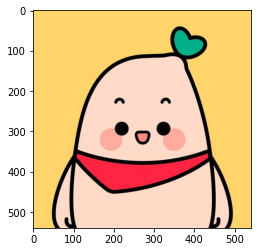

In [14]:

# prep for wordcloud argument 
font_path = './font/simhei.ttf'
imageforColors = np.array(Image.open('./mask/captain_red.jpg'))
plt.imshow(imageforColors)


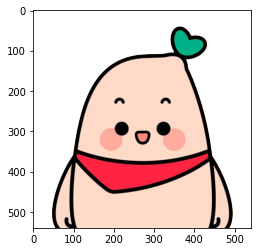

In [8]:
mask = np.array(Image.open('./mask/captain_red_mask.png'))
plt.imshow(mask)

### 词云参数，写在（）中切每一项都需要逗号结尾
- font_path : 字体地址
- mask: 外框
- random_state: 随机位置，可以调整单词散布方式
- width & height： 图像宽度&图像高度
- background_color: 背景颜色； 透明背景是： background_color= 'rgba(255,255,255,0)', mode = 'RGBA',
- contour_color: 外框线颜色

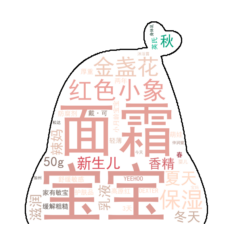

In [15]:
#Pass in argument for WC
wc = WordCloud(
    font_path = font_path, 
    mask = mask, 
    random_state = 42,
    width = 500,
    height = 500,
    background_color='white',
    contour_color= 'black',
    contour_width=3,

)

wc.generate_from_frequencies(wc_dict)
#create coloring from image
image_colors = ImageColorGenerator(imageforColors)
#.recolor method
plt.imshow(wc.recolor(color_func = image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

### 保存图片
默认会保存在代码所在目录，需要改明明或格式直接修改./后文件名和后缀即可。

In [10]:
#Saving the wordcloud to file
wc.to_file('./wordcloud.png')